In [1]:
import pandas as pd

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

def generate_dataset():
  dataset = make_classification(n_samples=20, n_features=1, n_repeated=0, n_redundant=0,  shift=30, 
                                scale=10, n_classes=2, n_clusters_per_class=1, n_informative=1, 
                                class_sep=1, random_state=1)
  df = pd.DataFrame(dataset[0])
  df = pd.concat([(np.ceil(df)).astype(int), pd.DataFrame(dataset[1])], axis=1)
  df.columns = ['GRE_Score', 'Admission']
  return df

In [28]:
data = generate_dataset()
data.head()

,GRE_Score,Admission
0,310,1
1,297,0
2,318,1
3,290,0
4,288,0


<Axes: xlabel='GRE_Score', ylabel='Admission'>

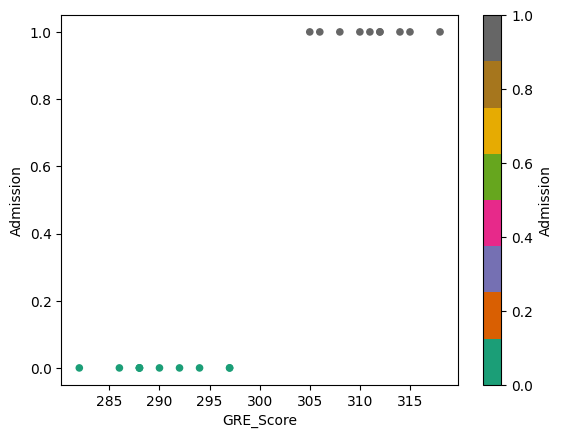

In [29]:
data.plot.scatter(x = "GRE_Score", y = "Admission", c = "Admission", cmap = "Dark2")

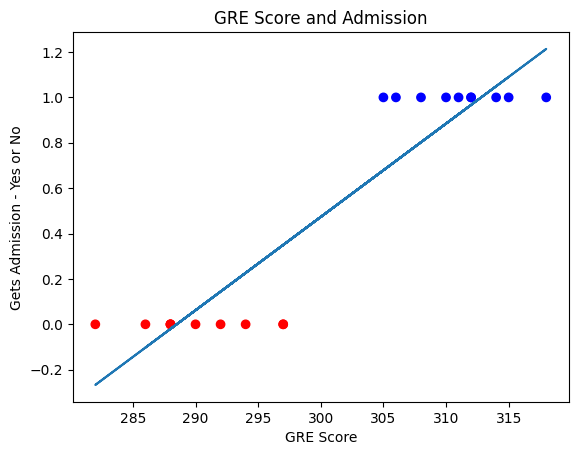

In [16]:
# Import LinearRegression from sklearn.linear_model
from sklearn.linear_model import LinearRegression

map_color = np.array(['r', 'b'])

x = data[["GRE_Score"]].to_numpy()
y = data[["Admission"]].to_numpy()

linearRegressor = LinearRegression()
linearRegressor.fit(x, y)

plt.scatter(x, y, c=map_color[y.ravel()])
plt.plot(x, linearRegressor.predict(x))
plt.title('GRE Score and Admission')
plt.xlabel('GRE Score')
plt.ylabel('Gets Admission - Yes or No')

plt.show()

## Logistic Regression

Let’s recall the equation of simple linear regression.
 
$$\hat{y} = \beta_0 + \beta_1\ x$$

where  $\beta_0$ and $\beta_1$ are the regression coefficients and $x$ is the input feature.

**In logistic regression, we pass the output of the linear regression $\hat{y}$ to a function known as the sigmoid function**. The sigmoid function is of the following form:

$$\sigma(z) = \frac 1 {(1+ e^{-z})} $$

 
where $z$ is any input real number. We can plot $\sigma(z)$ as follows:

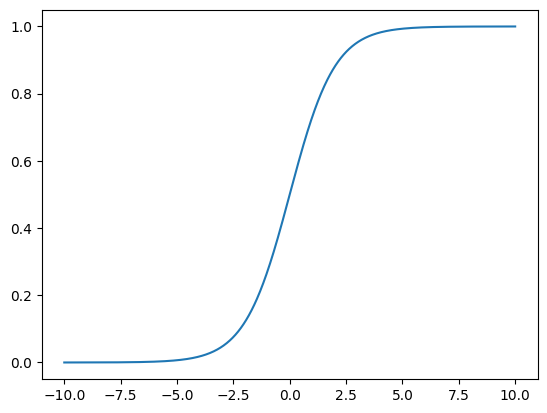

In [21]:
x = np.linspace(-10,10, 1000)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

plt.plot(x, sigmoid(x))
# plt.plot(x,x)

The function $\sigma(z)$, shown above, maps any real number to the [0, 1] interval, making it useful for classification. This function $\sigma(z)$ is sometimes also called the logistic sigmoid function or logistic curve.
 

As mentioned above, $\hat{y}$ is the input to this sigmoid function $\sigma(z)$, which means that $z=\beta_0 + \beta_1 x$. Let the output of the logistic regression for a sample $x$ be $p(x)$. Then $$p(x) = \sigma(z) = \frac 1 {1 + e^{-z}} = \frac 1 {1 + e^{-(\beta_0 + \beta_1x)}}$$ 

**The output of logistic regression, $p(x)$ gives us the probability of a sample belonging to class 1, and $1-p(x)$ gives us the probability of it belonging to class 0.**

From the above equations, we can see that we need to estimate the regression coefficients $\beta_0$, $\beta_1$. The discussion of the optimization method used to compute the coefficients is beyond the scope of this chapter. For now, we simply rely on Scikit-Learn's [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) object to compute the values for us.

In [30]:
x = data[["GRE_Score"]].to_numpy()
y = data[["Admission"]].to_numpy()

lin_reg = LinearRegression()
lin_reg.fit(x,y)

LinearRegression()

In [31]:
y_hat = lin_reg.predict(x)

In [34]:
prob_y = sigmoid(y_hat)

In [42]:
result = prob_y > 0.6
result.astype(int).flatten()

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0])

In [44]:
y.flatten()

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0])